In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pylab as plt

In [2]:
#I read in only part of my data due to size constraints; I am working with only one year -2020 
df = pd.read_csv("Parking_Violations_Issued_-_Fiscal_Year_2020.csv")

C:\Users\hcho1\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (18,29,38,39) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Preliminary Data Cleaning

In [3]:
#change display options and print out basic header 

pd.set_option('display.max_columns', None)
df.head(1000)


,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1477633194,J58JKX,NJ,PAS,05/08/1972 12:00:00 AM,16,SDN,HONDA,P,8730,5130,5280,0,72.0,72,504,342924,T504,0000,0523P,NaN,K,F,270,43 ST,NaN,0,408,E2,NaN,YYYYYBB,0800A,0400P,BK,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN
1,1449715424,KRE6058,PA,PAS,08/29/1977 12:00:00 AM,98,SUBN,ME/BE,P,86530,71800,73110,0,77.0,77,77,961115,0077,0000,0428P,NaN,K,F,1953,UNION ST,NaN,0,408,F1,NaN,BBBBBBB,ALL,ALL,BLK,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN
2,1455779155,444326R,NJ,PAS,10/03/1988 12:00:00 AM,20,SDN,LEXUS,P,27030,41330,69230,0,88.0,88,730,535422,T730,0000,0625A,NaN,K,O,45,CLERMONT AVENUE,NaN,0,408,D,NaN,BBBBBBB,ALL,ALL,BLACK,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN
3,1458800908,F728330,OH,PAS,01/03/1990 12:00:00 AM,21,SDN,CHEVR,P,33030,93630,58730,0,90.0,90,301,355074,T301,0000,1106A,NaN,K,F,218,DIVISION AVE,NaN,0,408,C,NaN,BYBBYBB,1100A,1230P,NaN,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN
4,1466038676,FMY9090,NY,PAS,02/14/1990 12:00:00 AM,21,SUBN,JEEP,S,45130,23930,68130,20210915,90.0,90,0,668676,KNBO,0000,1253A,NaN,K,F,850,GRAND ST,NaN,0,408,D1,NaN,BYBBYBB,1200A,0300A,GREY,0.0,2015,-,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7060223770,EBJ2456,NY,PAS,02/16/2017 12:00:00 AM,38,4DSD,HYUND,T,69530,18950,69130,20170808,70.0,70,70,346022,T802,A,1041P,NaN,K,F,50,Parkside Ave,NaN,0,408,I4,NaN,YYYYYY,0700A,1100P,GREY,NaN,2004,NaN,0,I,NaN,NaN,NaN,NaN
996,7060223757,EJH5072,NY,PAS,02/16/2017 12:00:00 AM,38,SUBN,SUZUK,T,69530,18950,69130,20180616,70.0,70,70,346022,T802,A,1038P,NaN,K,F,50,Parkside Ave,NaN,0,408,C3,NaN,YYYYYY,0700P,1100P,SILVE,NaN,2010,NaN,0,I,NaN,NaN,NaN,NaN
997,8039052932,EBA8498,NY,PAS,02/16/2017 12:00:00 AM,68,2DSD,HONDA,T,70930,50830,23130,20170903,73.0,73,73,361885,T301,B,0109P,NaN,K,F,1627,Pitkin Ave,NaN,0,408,D1,NaN,NaN,NaN,NaN,GR,NaN,0,NaN,0,Pitk,NaN,NaN,NaN,NaN
998,8039052919,CDG829,VT,PAS,02/16/2017 12:00:00 AM,21,4DSD,FORD,T,80430,38430,38330,20161288,73.0,73,73,361885,T301,B,1217P,NaN,K,F,1725,St Marks Ave,NaN,0,408,D1,NaN,Y Y,1130A,0100P,SILVE,NaN,0,NaN,0,Pitk,NaN,NaN,NaN,NaN


In [4]:
#check percentage of missing data for columns 
df.isna().mean().round(4) * 100

Summons Number                         0.00
Plate ID                               0.00
Registration State                     0.00
Plate Type                             0.00
Issue Date                             0.00
Violation Code                         0.00
Vehicle Body Type                      0.37
Vehicle Make                           0.50
Issuing Agency                         0.00
Street Code1                           0.00
Street Code2                           0.00
Street Code3                           0.00
Vehicle Expiration Date                0.00
Violation Location                    36.32
Violation Precinct                     0.00
Issuer Precinct                        0.00
Issuer Code                            0.00
Issuer Command                        35.64
Issuer Squad                          35.64
Violation Time                         0.00
Time First Observed                   95.65
Violation County                       0.33
Violation In Front Of Or Opposit

In [5]:
#remove based off percentage missing  - 90% and above
remove_na = ["Time First Observed", "Meter Number", "Unregistered Vehicle?", "No Standing or Stopping Violation", "Hydrant Violation", "Double Parking Violation"]

#remove due to technical constraints - will incorporate geolocation data next step 
remove_loco = ["Street Code1", "Street Code2", "Street Code3", "Violation Location", "Violation In Front Of Or Opposite", "House Number", "Street Name", "Intersecting Street"]

#remove extraneous information for dataset size  
remove_ext = ["Issuer Code", "Violation Legal Code", "Days Parking In Effect", "Violation Post Code", "Violation Description", "Date First Observed"]

total_dropped = remove_na + remove_loco + remove_ext



df = df.drop(total_dropped, axis = 1) 

In [6]:
#Split Issue Date into date and year 

df['Date'] = pd.to_datetime(df['Issue Date']).dt.date
df['Time'] = pd.to_datetime(df['Issue Date']).dt.time
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Day'] = pd.to_datetime(df['Date']).dt.day

X = df.loc[:, df.columns != 'Time']
new_dropped = ["Issue Date", "Date", 'Time']
df = df.drop(new_dropped, axis = 1) 

In [7]:
#Variables Within our Evaluation 
cat = ["Registration State", "Plate Type", "Violation Code", "Vehicle Body Type", "Vehicle Make", 
       "Issuing Agency", "Violation Precinct", "Issuer Precinct", 
       "Issuer Command", "Issuer Squad", "Violation County", 
      "Law Section", "Sub Division", "Vehicle Color" , "Range"]
       

num = ["Vehicle Expiration Date", "Violation Time", "Vehicle Year", "Feet From Curb", "Year", "Month", "Day"]

In [8]:
#number 

print("number of rows:", df.shape[0])
print("number of columns:", df.shape[1])


number of rows: 12495734
number of columns: 25


# Variable Cleaning

In [9]:
#MAKE DIFFERENT BUCKETS FOR COMPETING GROUPS 


#Diplomat
df["Violation Code"].replace({28:100, 64:100, 65:100, 81:100}, inplace = True)

#Bus
df["Violation Code"].replace({1:200, 2:200, 3:200, 4:200, 5:200, 29:200, 79:200, 77:200}, inplace = True)

#Moving Violation 
df["Violation Code"].replace({7:300, 8:300, 12:300, 36:300}, inplace = True)

#No Parking
df["Violation Code"].replace({20:400, 21:400, 24:400, 63:400, 27:400}, inplace = True)

#Trailer 
df["Violation Code"].replace({6:500, 66:500}, inplace = True)

#Blocking 
df["Violation Code"].replace({9:600, 45:600, 49:600, 98:600, 54:600, 40:600, 67:600}, inplace = True)

#Credentials 
df["Violation Code"].replace({70:700, 71:700, 72:700, 73:700, 74:700, 75:700, 76:700, 83:700, 87:700, 33:700}, inplace = True)

#Commerical Violations  
df["Violation Code"].replace({78:800, 82:800, 84:800, 59:800, 85:800, 88:800}, inplace = True)

#Metered Violations  
df["Violation Code"].replace({32:900, 34:900, 37:900, 38:900, 31:900, 42:900, 39:900, 69:900, 44:900, 43:900}, inplace = True)

#Geographic Violations   
df["Violation Code"].replace({86:1000, 89:1000, 47:1000, 58:1000, 57:1000}, inplace = True)

#Taxi 
df["Violation Code"].replace({13:1100, 22:1100, 23:1100}, inplace = True)

#Credentials 
df["Violation Code"].replace({10:1200, 14:1200, 15:1200, 17:1200, 16:1200, 18:1200, 19:1200, 25:1200, 26:1200, 30:1200, 11:1200}, inplace = True)


#Highway 
df["Violation Code"].replace({55:1300, 56:1300}, inplace = True)
    

#Proximity Parking  
df["Violation Code"].replace({51:1400, 52:1400, 50:1400, 46:1400, 48:1400, 53:1400, 60:1400, 62:1400, 97:1400, 96:1400, 61:1400, 68:1400}, inplace = True)


#Equipment 
df["Violation Code"].replace({80:1500, 93:1500, 92:1500}, inplace = True)


#Commerce 
df["Violation Code"].replace({35:1600, 91:1600, 90:1600}, inplace = True)

#Other 
df["Violation Code"].replace({41:1700, 99:1700, 94:1700}, inplace = True)



In [10]:
#drop values not in data dictionary 0,95
df = df[df["Violation Code"] != 95]
df = df[df["Violation Code"] != 0]

In [11]:
new_year = []
for i in df['Vehicle Year']:
    if i == 0:
        new_year.append(np.nan)
    else:
        new_year.append(i)
        
df['Vehicle Year'] = new_year

In [12]:
#CONVERT times from string to time readable format  

new_column = []
for i in df['Violation Time']:
    i = str(i)
    if i[-1] == 'P':
        i = i[0:2] +":" +i[2:4] + " " +i[-1]+"M"
        new_column.append(i)

    elif (i[-1] == 'A'):
        i = i[0:2] +":" +i[2:4] + " " +i[-1]+"M"
        new_column.append(i)
    
    else:
        new_column.append(np.nan)
        
df['Violation Time'] = new_column
        
df['Violation Time'] = pd.to_datetime(df['Violation Time'], errors = 'ignore')

In [13]:
#create categorical variable for ease of use 
df["Range"] = df["From Hours In Effect"] + df["To Hours In Effect"]

range_array = []
for i in df['Range']:
    try:
        i = str(i)
        if i[:3] == "ALL":
            range_array.append("ALL")
        elif (i[4] == 'A') & (i[-1] == 'A'):
            i = i[0:2] +":" +i[2:4] + "AM - " + i[5:7] +":" +i[7:9] + "AM"
            range_array.append(i)

        elif (i[4] == 'A') & (i[-1] == 'P'):
            i = i[0:2] +":" +i[2:4] + "AM - " + i[5:7] +":" +i[7:9] + "PM"
            range_array.append(i)

        elif (i[4] == 'P') & (i[-1] == 'A'):
            i = i[0:2] +":" +i[2:4] + "PM - " + i[5:7] +":" +i[7:9] + "AM"
            range_array.append(i)


        elif (i[4] == 'P') & (i[-1] == 'P'):
            i = i[0:2] +":" +i[2:4] + "PM - " + i[5:7] +":" +i[7:9] + "PM"
            range_array.append(i)

        else:
            range_array.append(np.nan)
    except: 
        range_array.append(np.nan)

df['Range'] = range_array

new_dropped = ["From Hours In Effect", "To Hours In Effect"]
df = df.drop(new_dropped, axis = 1) 

In [14]:
#Vehicle Expiration Date 
expiration_array = []
for i in df['Vehicle Expiration Date']: 
    if i == 0: 
        expiration_array.append(np.nan)
    elif i != 0:
        i = str(i)
        i = i[:4] + "-" + i[4:6] + '-' + i[6:]
        expiration_array.append(i)
    else:
        expiration_array(np.nan)

df['Vehicle Expiration Date']  = expiration_array
df['Vehicle Expiration Date'] = pd.to_datetime(df['Vehicle Expiration Date'], format = '%Y-%m-%d', errors = 'ignore')

# EDA 

In [15]:
#Violation Time Value Counts 
#cannot plot, need to clean and standardize values in order to get plot 

df['Violation Time'].describe()

count     12493192
unique        1656
top       08:36 AM
freq         28581
Name: Violation Time, dtype: object

In [16]:
#Vehicle Expiration Time Value Counts 
#cannot plot, need to clean and standardize values in order to get plot 

df['Vehicle Expiration Date'].describe()

count        7747890
unique          4123
top       8888-00-88
freq         1531561
Name: Vehicle Expiration Date, dtype: object

In [17]:
df['Vehicle Year'].describe()

count    1.024112e+07
mean     2.013025e+03
std      5.674248e+00
min      1.970000e+03
25%      2.009000e+03
50%      2.015000e+03
75%      2.018000e+03
max      2.069000e+03
Name: Vehicle Year, dtype: float64

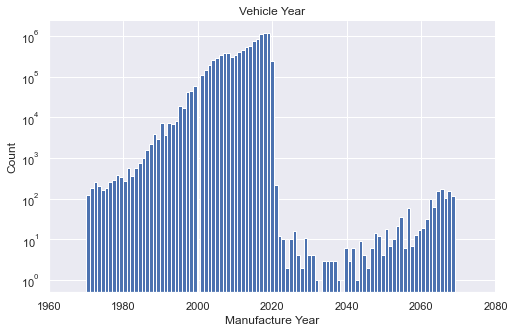

In [18]:
#vehicle year
import seaborn as sns

sns.set_theme()

mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False
fig2 = plt.figure(figsize = (8,5))
df['Vehicle Year'].plot.hist(bins = 100)
plt.xlim((1960,2080))
plt.yscale('log')
plt.xlabel("Manufacture Year")
plt.ylabel('Count')
plt.title("Vehicle Year")

plt.plot()
plt.savefig('figures/standard figures/Vehicle Year Histogram.png', bbox_inches = 'tight')







In [19]:
df['Feet From Curb'].describe()

count    1.249367e+07
mean     8.925022e-02
std      7.075128e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.600000e+01
Name: Feet From Curb, dtype: float64

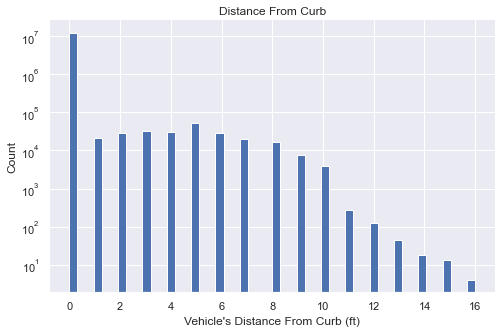

In [20]:
#Feet From Curb

fig2 = plt.figure(figsize = (8,5))
df['Feet From Curb'].plot.hist(bins = 50)
plt.yscale('log')
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False
plt.xlabel("Vehicle's Distance From Curb (ft)")
plt.ylabel('Count')
plt.title("Distance From Curb")
plt.plot()
plt.savefig('figures/standard figures/Vehicle Distance From Curb Histogram.png', bbox_inches = 'tight')


In [21]:
ord = ["Year", "Month", "Day"]

for i in ord: 
    print(df[i].describe())

count    1.249367e+07
mean     2.019405e+03
std      5.001590e-01
min      1.972000e+03
25%      2.019000e+03
50%      2.019000e+03
75%      2.020000e+03
max      2.064000e+03
Name: Year, dtype: float64
count    1.249367e+07
mean     6.714129e+00
std      3.558976e+00
min      1.000000e+00
25%      3.000000e+00
50%      7.000000e+00
75%      1.000000e+01
max      1.200000e+01
Name: Month, dtype: float64
count    1.249367e+07
mean     1.581057e+01
std      8.641242e+00
min      1.000000e+00
25%      8.000000e+00
50%      1.600000e+01
75%      2.300000e+01
max      3.100000e+01
Name: Day, dtype: float64


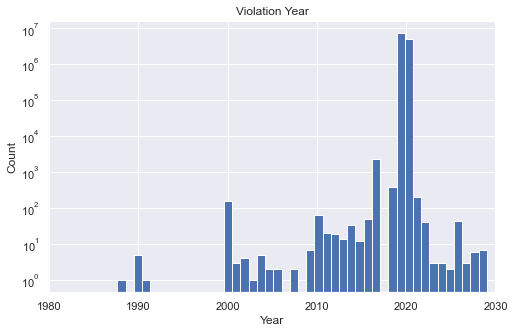

In [22]:
sns.set_theme()
fig2 = plt.figure(figsize = (8,5))

df['Year'].plot.hist(bins = 100)
plt.xlim((1980,2030))
plt.yscale('log')
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False
plt.xlabel("Year")
plt.ylabel('Count')
plt.title("Violation Year")
plt.plot()
plt.savefig('figures/standard figures/Violation Year Histogram.png', bbox_inches = 'tight')


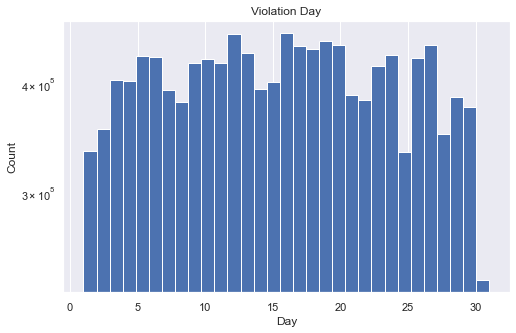

In [23]:
sns.set_theme()
fig2 = plt.figure(figsize = (8,5))

df['Day'].plot.hist(bins = 31)
plt.yscale('log')
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False
plt.xlabel("Day")
plt.ylabel('Count')
plt.title("Violation Day")
plt.plot()
plt.savefig('figures/standard figures/Violation Day Histogram.png', bbox_inches = 'tight')


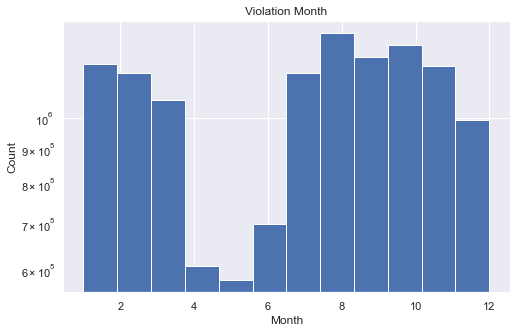

In [24]:
sns.set_theme()
fig2 = plt.figure(figsize = (8,5))

df['Month'].plot.hist(bins = 12)
plt.yscale('log')
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False
plt.xlabel("Month")
plt.ylabel('Count')
plt.title("Violation Month")
plt.plot()

plt.savefig('figures/standard figures/Violation Month Histogram.png', bbox_inches = 'tight')


In [25]:
#Get Value Counts for Categorical Variables and unique values

for i in cat:
    print(df[i].value_counts())
    print(df[i].nunique())

NY    9752021
NJ    1095933
PA     338732
FL     174034
CT     165185
       ...   
PE         18
SK          8
MX          7
NT          3
YT          2
Name: Registration State, Length: 68, dtype: int64
68
PAS    9536917
COM    1815663
OMT     530283
SRF     125147
OMS     121161
        ...   
ATD          1
JWV          1
SNO          1
GSC          1
WUG          1
Name: Plate Type, Length: 87, dtype: int64
87
300     4199182
400     2044124
900     1765273
1200    1589533
700      860941
1400     763171
600      623732
200      279024
800      175607
1000     106064
500       35433
1100      29366
100       11698
1700       5620
1500       2898
1600       1703
1300        303
Name: Violation Code, dtype: int64
17
SUBN    4772132
4DSD    3342464
VAN     1471694
DELV     633709
PICK     331281
         ...   
MF            1
TCRT          1
WAF           1
SCOM          1
OOXI          1
Name: Vehicle Body Type, Length: 1634, dtype: int64
1634
TOYOT    1395154
HONDA    1343167
FORD

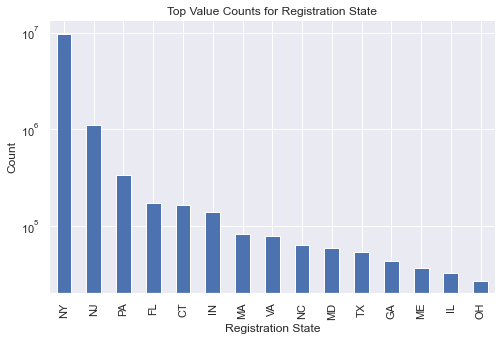

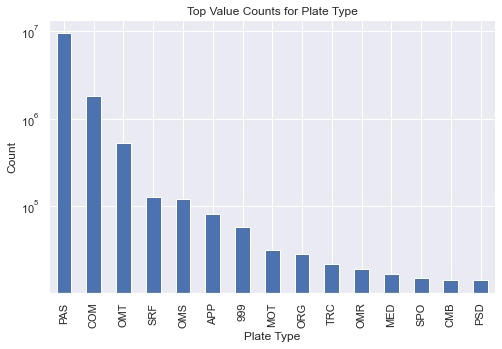

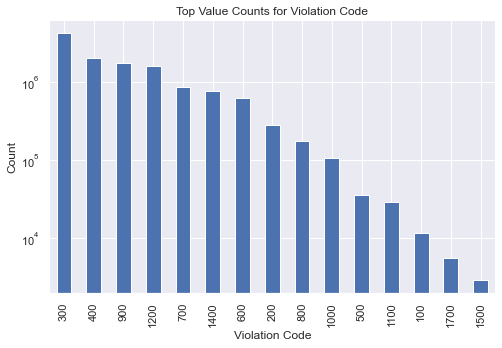

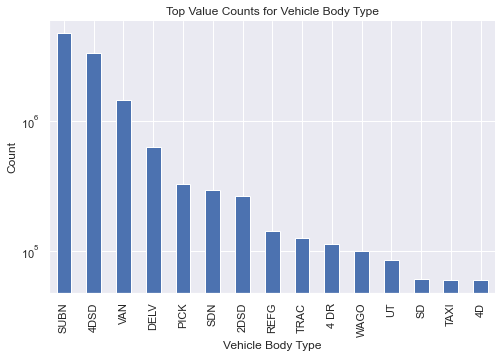

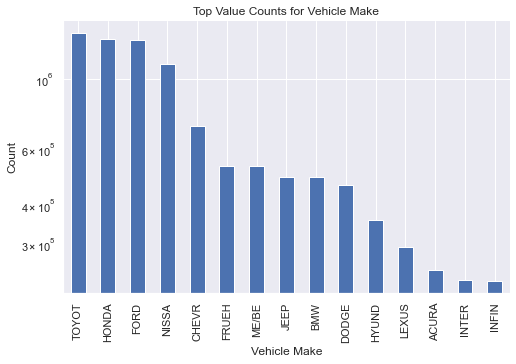

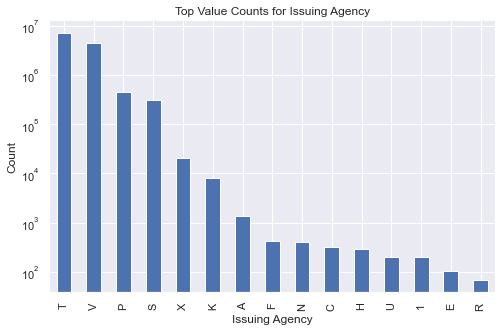

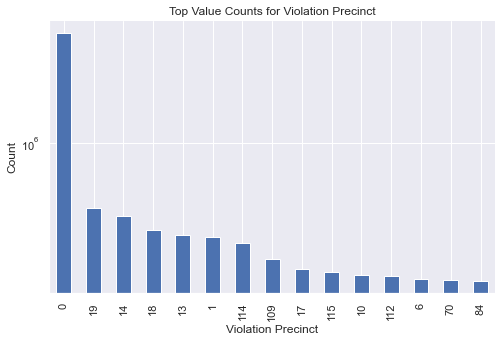

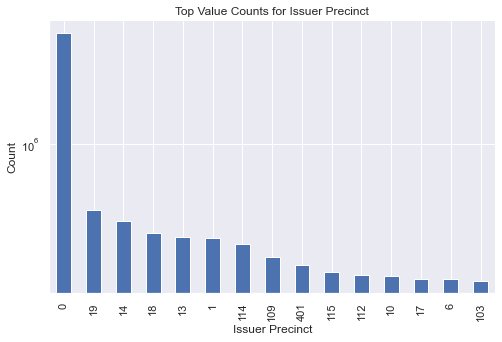

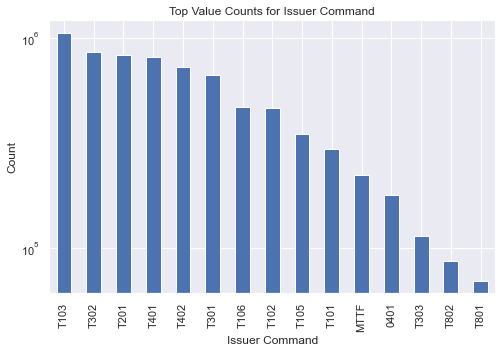

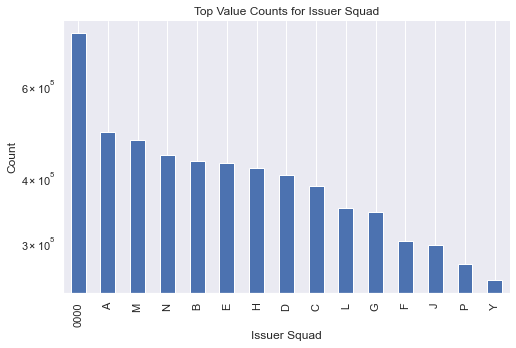

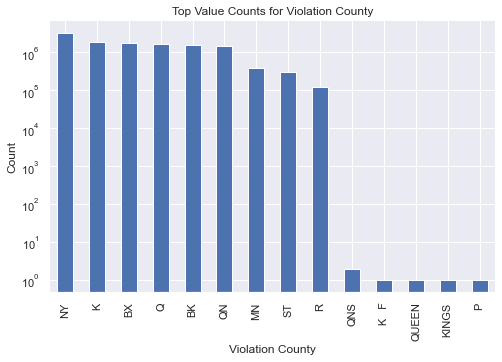

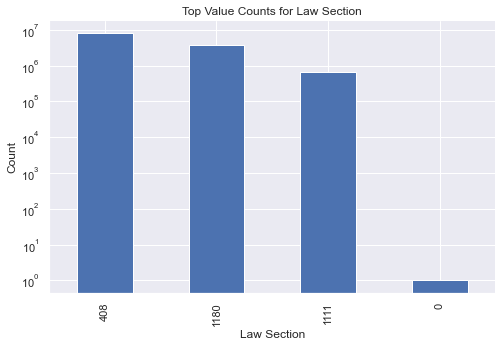

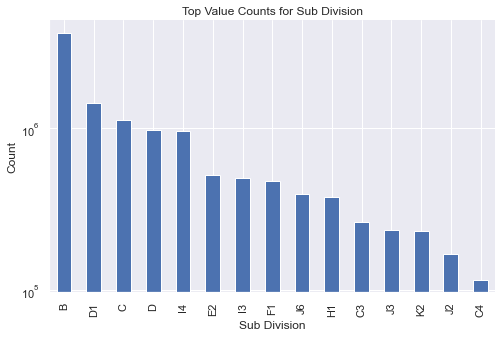

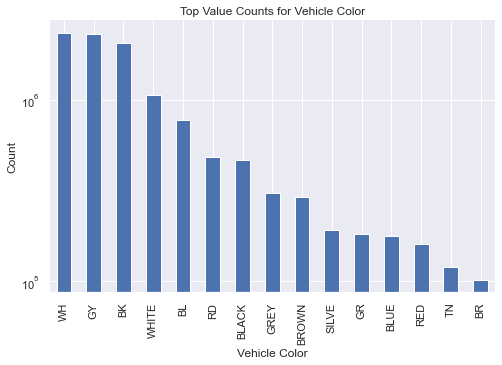

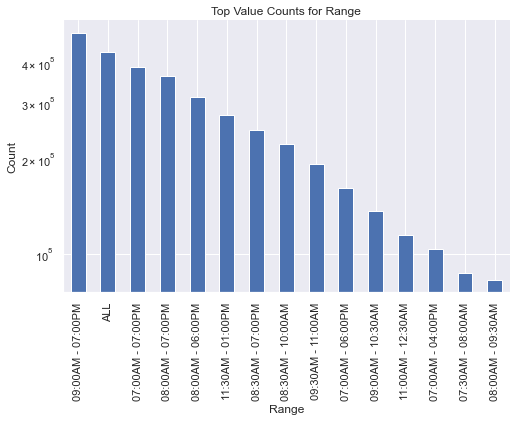

In [26]:
#Plot Categorical Values 

for i in cat:
    fig2 = plt.figure(figsize = (8,5))
    df[i].value_counts()
    

    pd.value_counts(df[i])[:15].plot.bar()
   
    mpl.rcParams["axes.spines.right"] = False
    mpl.rcParams["axes.spines.top"] = False
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.xticks(rotation = 'vertical')
    plt.title("Top Value Counts for {}".format(i))
    plt.yscale('log')
    plt.plot()
    plt.savefig('figures/standard figures/{} Bar Plot.png'.format(i), bbox_inches = 'tight')
  


# "Interesting" Figures 

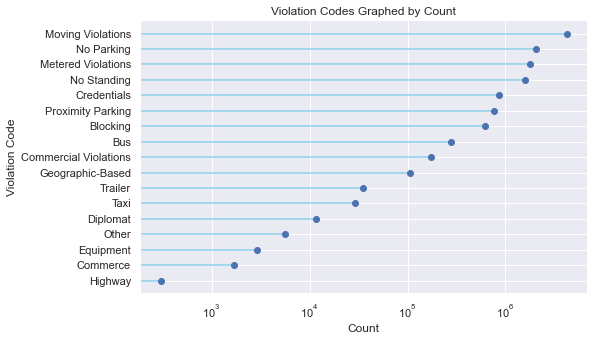

In [27]:
from matplotlib.pyplot import figure
line_df = pd.DataFrame({'group':list(map(str, ('Moving Violations', 'No Parking', 'Metered Violations', 
                                     'No Standing', 'Credentials', 
              'Proximity Parking', 'Blocking', 'Bus', 
              'Commercial Violations', 'Geographic-Based', 'Trailer', 'Taxi', 
              'Diplomat', 'Other', 'Equipment', 'Commerce', 'Highway'))), 
                'values': [4199182, 2044124, 1765273, 1589533,  860941,  763171,  623732,
        279024,  175607,  106064,   35433,   29366,   11698,    5620,
          2898, 1703, 303]})
    
order = line_df.sort_values(by='values') 
plot_range =range(1,len(line_df.index)+1)
fig = plt.figure(figsize = (8,5))
plt.hlines(y = plot_range, xmin = 0, xmax = order['values'], color = 'skyblue')
plt.plot(order['values'], plot_range, "o")
plt.yticks(plot_range, order['group'])
plt.xscale('log')
plt.xlabel('Count')
plt.ylabel('Violation Code')
plt.title('Violation Codes Graphed by Count')
plt.rcParams.update({'font.size': 14})
plt.plot()
plt.savefig('figures/Violation Codes Graphed by Count.png', bbox_inches = 'tight')


<Figure size 576x360 with 0 Axes>

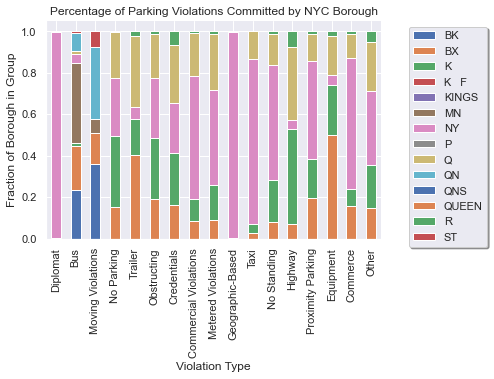

In [28]:
from matplotlib.pyplot import figure

#Plot % of Parking Violations by Borough for Each Parking Violation 
fig = plt.figure(figsize = (8,5))
counted_matrix = df.groupby([ 'Violation Code', 'Violation County']).size().unstack()
count_norm = counted_matrix.div(counted_matrix.sum(axis = 1), axis = 0)
count_norm.plot(kind = "bar", stacked = True)
plt.legend(loc='upper center', bbox_to_anchor=(1.2,1),
          fancybox=True, shadow=True, ncol=1)
plt.title("Percentage of Parking Violations Committed by NYC Borough")
plt.xlabel('Violation Type')
plt.xticks( [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], labels = ['Diplomat', 'Bus', 'Moving Violations', 'No Parking', 'Trailer', 
              'Obstructing', 'Credentials', 'Commercial Violations', 
              'Metered Violations', 'Geographic-Based', 'Taxi', 'No Standing', 
              'Highway', 'Proximity Parking', 'Equipment', 'Commerce', 'Other'], 
          rotation = 'vertical',)
plt.ylabel('Fraction of Borough in Group')

plt.plot()
plt.savefig('figures/Percentage of Parking Violations Committed by NYC Borough.png', bbox_inches = 'tight')



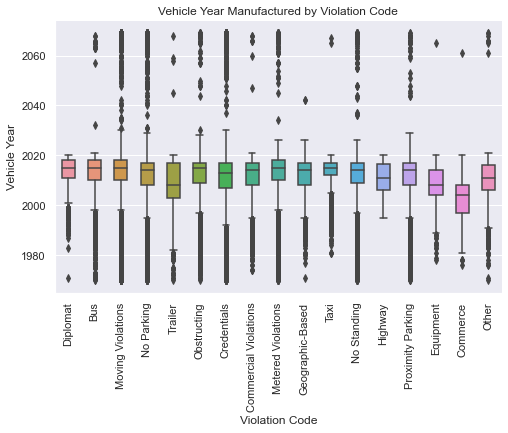

In [29]:
import seaborn as sns

#Plot Vehicle Year by Violation Code
fig2 = plt.figure(figsize = (8,5))
sns.boxplot(x = df['Violation Code'], y = df['Vehicle Year'], width = 0.5)

plt.xticks( [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], labels = ['Diplomat', 'Bus', 'Moving Violations', 'No Parking', 'Trailer', 
              'Obstructing', 'Credentials', 'Commercial Violations', 
              'Metered Violations', 'Geographic-Based', 'Taxi', 'No Standing', 
              'Highway', 'Proximity Parking', 'Equipment', 'Commerce', 'Other'], 
          rotation = 'vertical',)
plt.title('Vehicle Year Manufactured by Violation Code')
plt.plot()
plt.savefig('figures/Vehicle Year Manufactured by Violation Code.png', bbox_inches = 'tight')




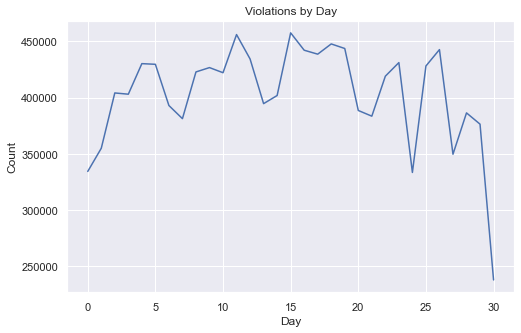

In [30]:
#Plot Violations by Time: Day



day_array = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
count_array = np.array([334305, 354892,404077,402968,430132,429545,392907,381228,422761,426617,422065,455975,434295,394576,401795,457498,442067,438554,447655,443599,388504,383438,418972,431057,333399,428043,442603,349607,386349,376336,237853])


sns.set_theme()
fig2 = plt.figure(figsize = (8,5))
plt.title("Violations by Day")
plt.xlabel("Day")
plt.ylabel("Count")
plt.plot(day_array,count_array)

plt.plot()
plt.savefig('figures/Parking Violations by Day.png', bbox_inches = 'tight')





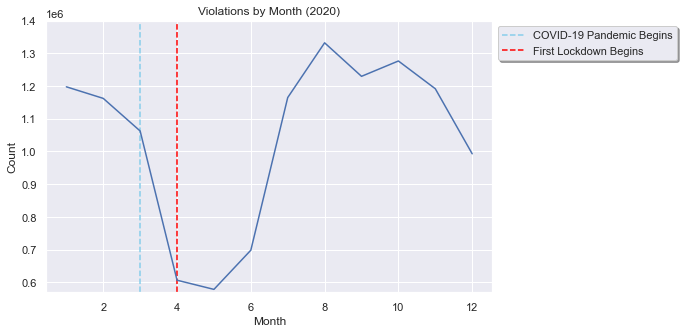

In [31]:
#Plot Violations by Time: Month
df_month = pd.DataFrame({'month': range(1,13), 
                  'count': [1197529, 1162138, 1062525, 606917, 578920, 698558,
                          1164695, 1331867, 1229526, 1276364, 1191642, 992991]})

sns.set_theme()
fig2 = plt.figure(figsize = (8,5))
plt.title("Violations by Month (2020)")
plt.xlabel("Month")
plt.ylabel("Count")


plt.yscale('linear')
plt.ylim(570000, 1400000)

plt.axvline(3, color = 'skyblue', linestyle = '--', label = 'COVID-19 Pandemic Begins')
plt.axvline(4, color = 'red', linestyle = '--', label = 'First Lockdown Begins')
plt.legend(bbox_to_anchor=(1,1), fancybox=True, shadow=True, ncol=1)
plt.plot('month','count', data = df_month)
plt.savefig('figures/Parking Violations by Month.png', bbox_inches = 'tight')



plt.show()



In [32]:
#Scatterplot matrix, most of my data is categorical so i extract the numeric features and then make a another df with them
#read in data partly?
df1 = df.loc[:, num]
df1 = df1.iloc[:, 2:]


In [33]:
df1.head()

,Vehicle Year,Feet From Curb,Year,Month,Day
0,NaN,0,1972,5,8
1,NaN,0,1977,8,29
2,NaN,0,1988,10,3
3,NaN,0,1990,1,3
4,2015.0,0,1990,2,14


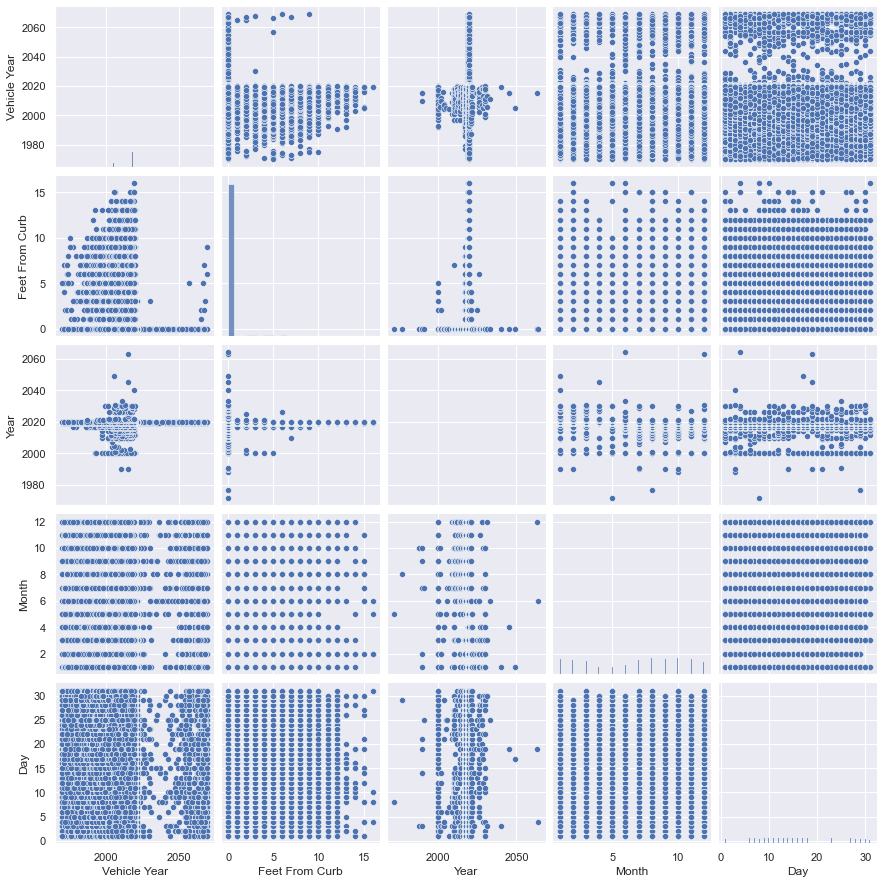

In [34]:
sns.pairplot(df1)
plt.plot()
plt.savefig('figures/standard figures/Scatter Matrix for Numerical Features.png', bbox_inches = 'tight')


# Data Preprocessing 

In [35]:
#convert to string for uniformity during preprocessing

df['Range'] = df['Range'].astype(str)

In [36]:
#create splits; using heavily imbalanced IID data so we should use stratified shuffle split
#I remove several variables from the preprocessing for the sake of computational power, as recommended by Andras

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedShuffleSplit


y = df['Violation Code']
X = df.loc[:, df.columns != 'Violation Code']
X = df.loc[:, df.columns != 'Violation Time']
X = df.loc[:, df.columns != 'Range']
X = df.loc[:, df.columns != 'Issuer Command']
X = df.loc[:, df.columns != 'Issuer Squad']
X = df.loc[:, df.columns != 'Sub Division']


In [37]:
#begin splitting - I do a single split due to computation constraints 

split_train_oth = StratifiedShuffleSplit(n_splits = 1, train_size = 0.6, random_state = 42)

split_test_val = StratifiedShuffleSplit(n_splits = 1, train_size = 0.4, random_state = 42)

#Split into training and other sets

X_train = []
X_other = []
y_train = []
y_other = []

for train_i, other_i in split_train_oth.split(X,y):
    X_train = X.iloc[train_i]
    X_other = X.iloc[other_i]
    y_train = X.iloc[train_i]
    y_other = X.iloc[other_i]
    
#Split into validation and testing sets
    
X_val = []
X_test = []
y_val = []
y_test = []

for val_i, test_i in split_test_val.split(X,y):
    X_val = X.iloc[val_i]
    X_test = X.iloc[test_i]
    y_val = X.iloc[val_i]
    y_test = X.iloc[test_i]
    

In [38]:
#fitters 

#categorical data does not have natural rank or order, therefore I apply one_hot encoders to take care of the preprocessing
onehot_ftrs = ["Registration State", "Plate Type", "Vehicle Body Type", "Vehicle Make", 
       "Issuing Agency", "Violation Precinct", "Issuer Precinct",   "Violation County", 
      "Law Section",  "Vehicle Color" , "Range"]

print(len(onehot_ftrs))

#numerical data is imbalanced due to large size of dataset, use std ftr to standardize
std_ftrs = ["Vehicle Year", "Feet From Curb", "Year", "Month", "Day"]


print(len(std_ftrs))

X_train.head()

11
5


,Summons Number,Plate ID,Registration State,Plate Type,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Vehicle Expiration Date,Violation Precinct,Issuer Precinct,Issuer Command,Issuer Squad,Violation Time,Violation County,Law Section,Vehicle Color,Vehicle Year,Feet From Curb,Year,Month,Day,Range
12081077,4693011472,IENH90,FL,PAS,300,UT,CADIL,V,NaN,0,0,NaN,NaN,06:18 PM,BK,1180,GRY,2020.0,0,2020,6,3,nan
9230154,8556009670,HXM2983,NY,PAS,600,PICK,DODGE,T,2020-02-13,114,114,T401,YA,09:10 AM,Q,408,BK,2018.0,0,2020,2,16,nan
11160344,8784068619,85003MM,NY,COM,800,SUBN,CHEVR,T,2021-03-11,32,32,T800,B2,01:18 AM,NY,408,GY,2005.0,0,2020,4,16,09:00PM - 05:00AM
1160322,5107581742,HRE8512,NY,PAS,300,SUBN,CHEVR,V,NaN,0,0,NaN,NaN,04:17 PM,QN,1111,GY,2017.0,0,2019,7,26,nan
5085526,8727243254,69274MN,NY,COM,900,SUBN,KIA,T,2021-09-30,6,6,T105,D,11:49 AM,NY,408,GR,2018.0,0,2019,10,28,09:00AM - 07:00PM


In [39]:
#transformation pipeline

#impute missing values for onehot
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])

#convert numbers to standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

#collection of transformers the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, std_ftrs),
        ('cat', categorical_transformer, onehot_ftrs)])


In [40]:
#transform training set 

X_prep = preprocessor.fit_transform(X_train)

features = preprocessor.transformers_[0][-1] + \
                list(preprocessor.named_transformers_['cat'][1].get_feature_names(onehot_ftrs)) + \
                preprocessor.transformers_[2][-1]

# you can convert the numpy array back to a data frame with the feature names if you want
df_train = pd.DataFrame(data=X_prep)
print(df_train.shape)

# transform validation set
df_val = preprocessor.transform(X_val)
df_val = pd.DataFrame(data=df_val,columns = features)
print(df_val.shape)

# transform test set 
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = features)
print(df_test.shape)


MemoryError: Unable to allocate 480. GiB for an array with shape (7496203, 8592) and data type float64